In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob

In [39]:
DIR_PATH = "/content/drive/MyDrive/ds_study/DL_project2/"

SAMPLING_RATE = 44100

#### mp3파일 경로 데이터프레임 생성

In [40]:
# music_paths = glob.glob(DIR_PATH + "data/*.mp3")
# music_paths[:5]

In [41]:
# df_music_paths = pd.DataFrame(music_paths, columns=["Path"])
# df_music_paths.head()

In [42]:
# df_music_paths.to_csv(DIR_PATH + 'music_paths.csv', index=False) # csv 파일로 저장

In [79]:
df_music_paths = pd.read_csv(DIR_PATH + 'music_paths.csv')
df_music_paths.head()

,Path
0,/content/drive/MyDrive/ds_study/DL_project2/da...
1,/content/drive/MyDrive/ds_study/DL_project2/da...
2,/content/drive/MyDrive/ds_study/DL_project2/da...
3,/content/drive/MyDrive/ds_study/DL_project2/da...
4,/content/drive/MyDrive/ds_study/DL_project2/da...


In [80]:
df_music_paths.shape

(2341, 1)

# 음원 특성 추출

In [82]:
import librosa
import librosa.display
import IPython.display as ipd

In [45]:
music_path1 = df_music_paths.iloc[0,:][0]
music_path1

'/content/drive/MyDrive/ds_study/DL_project2/data/1635928836346_5e16363bb3999a2aa79fbd670ebc7f50_track.mp3'

In [46]:
music, sr = librosa.load(music_path1, sr=SAMPLING_RATE, duration=None) # 샘플링레이트 44100, 전체 길이
music, sr

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


(array([ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         1.3079050e-08, -3.8631548e-08,  0.0000000e+00], dtype=float32), 44100)

In [83]:
ipd.Audio(music, rate=sr)

Output hidden; open in https://colab.research.google.com to view.

In [84]:
# tempo 측정
librosa.beat.tempo(music, sr=sr)

array([89.10290948])

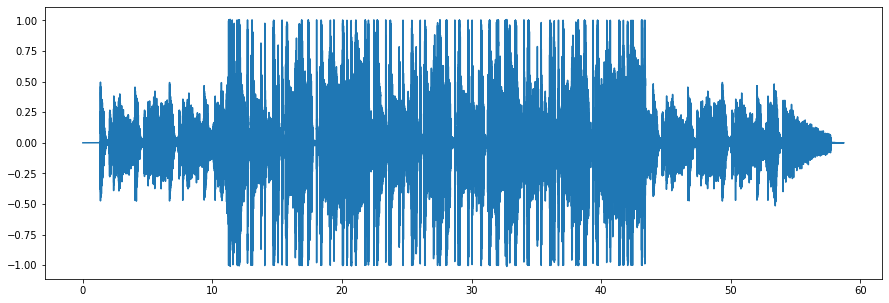

In [77]:
# plt.plot으로 시각화
time = np.linspace(0, len(music)/sr, len(music))

plt.figure(figsize=(15,5))
plt.plot(time, music)
plt.show()

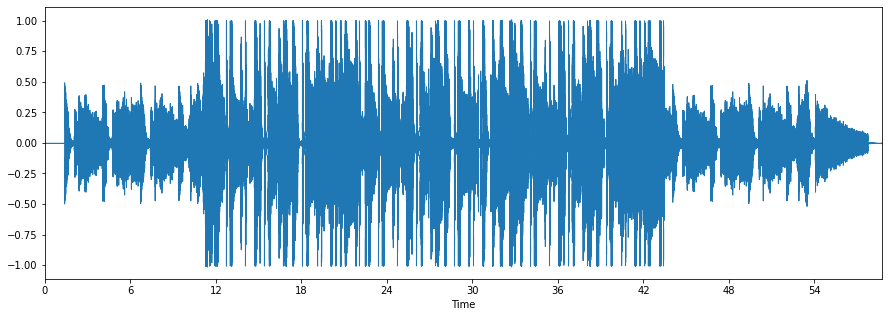

In [75]:
# waveplot으로 시각화
plt.figure(figsize=(15,5))
librosa.display.waveplot(music, sr)
plt.show()

## 음원 특성 추출(1) - Chroma 관련

In [49]:
# chroma_stft 시각화 함수 정의
def show_chroma_stft(music, sr):
  chroma_stft = librosa.feature.chroma_stft(music, sr)
  seconds = len(music)/SAMPLING_RATE

  plt.figure(figsize=(15,5))
  librosa.display.specshow(chroma_stft, sr=sr, x_axis='time', y_axis='chroma')
  plt.colorbar()
  plt.tight_layout()
  plt.xlabel('time')
  plt.ylabel('pitch class')
  plt.xticks(np.arange(0, seconds, seconds//10)) # 좌표간격 설정
  plt.show()

In [50]:
# chroma_cqt 시각화 함수 정의
def show_chroma_cqt(music, sr):
  chroma_cqt = librosa.feature.chroma_cqt(music, sr)
  seconds = len(music)/SAMPLING_RATE

  plt.figure(figsize=(15,5))
  librosa.display.specshow(chroma_cqt, sr=sr, x_axis='time', y_axis='chroma')
  plt.colorbar()
  plt.tight_layout()
  plt.xlabel('time')
  plt.ylabel('pitch class')
  plt.xticks(np.arange(0, seconds, seconds//10))
  plt.show()

In [51]:
# chroma_cens 시각화 함수 정의
def show_chroma_cens(music, sr):
  chroma_cens = librosa.feature.chroma_cens(music, sr)
  seconds = len(music)/SAMPLING_RATE

  plt.figure(figsize=(15,5))
  librosa.display.specshow(chroma_cens, sr=sr, x_axis='time', y_axis='chroma')
  plt.colorbar()
  plt.tight_layout()
  plt.xlabel('time')
  plt.ylabel('pitch class')
  plt.xticks(np.arange(0, seconds, seconds//10))
  plt.show()

#### STFT

In [52]:
chroma_stft = librosa.feature.chroma_stft(music, sr)
chroma_stft

array([[0.        , 0.        , 0.        , ..., 0.9537264 , 0.6833362 ,
        0.6829148 ],
       [0.        , 0.        , 0.        , ..., 1.        , 0.81575453,
        0.8228116 ],
       [0.        , 0.        , 0.        , ..., 0.9733237 , 0.8033398 ,
        0.78728247],
       ...,
       [0.        , 0.        , 0.        , ..., 0.87930286, 0.6540086 ,
        0.7175117 ],
       [0.        , 0.        , 0.        , ..., 0.92599165, 0.74907845,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.95959556, 0.6688272 ,
        0.79441476]], dtype=float32)

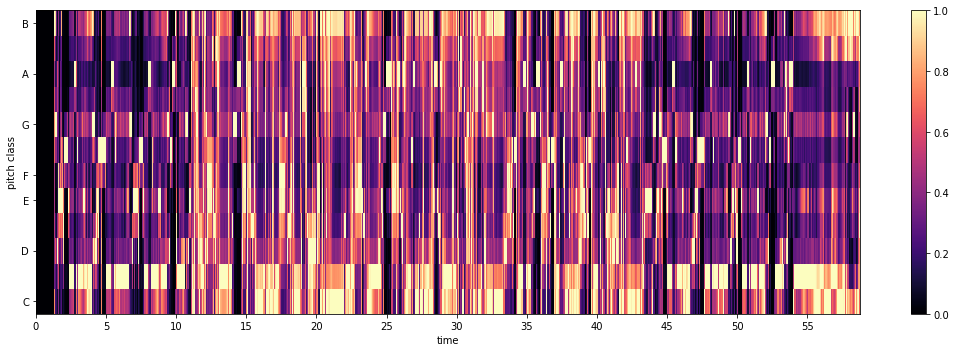

In [53]:
show_chroma_stft(music, sr)

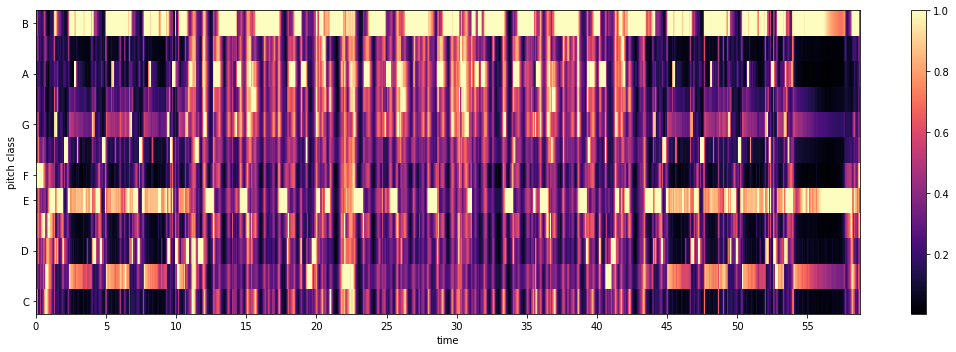

In [54]:
show_chroma_cqt(music, sr)

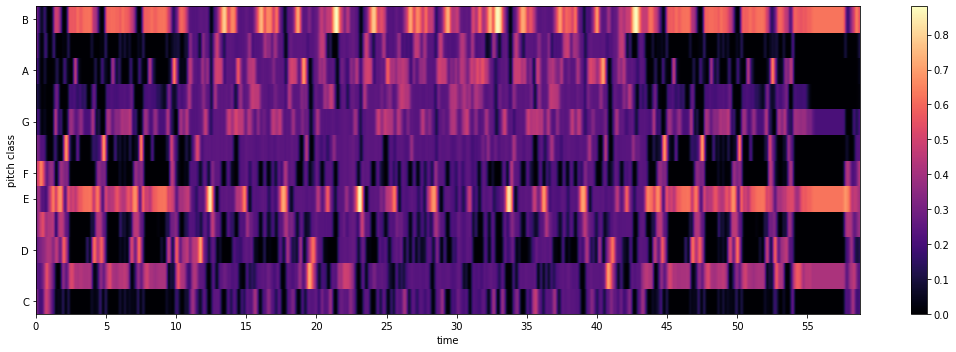

In [55]:
show_chroma_cens(music, sr)

#### test_data로 시각화

In [56]:
# 폴더1 음원 리스트 불러오기
music_test1 = glob.glob(DIR_PATH + 'test_data/1/*.mp3')
music_test1

["/content/drive/MyDrive/ds_study/DL_project2/test_data/1/It's You_더더(THETHE)_The One & The Other.mp3",
 '/content/drive/MyDrive/ds_study/DL_project2/test_data/1/너에게 쓰는 편지_MC몽_180 Degree.mp3']

In [57]:
# MC몽 "너에게 쓰는 편지"
music11, sr11 = librosa.load(music_test1[0], sr=SAMPLING_RATE, duration=None) # 샘플링레이트 44100, 전체 길이
music11, sr11

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


(array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), 44100)

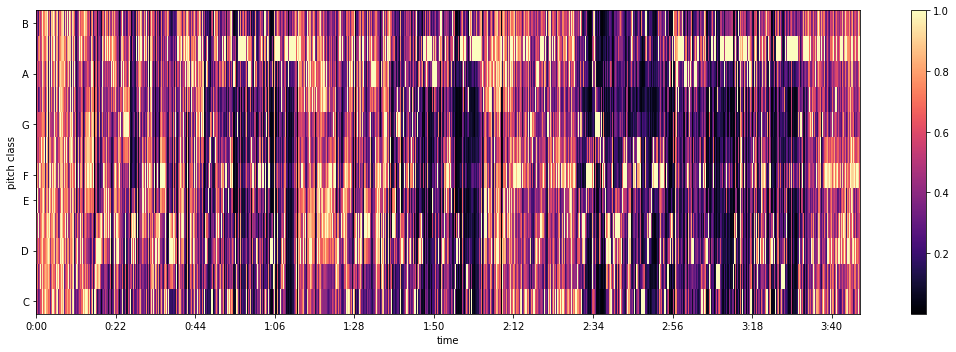

In [58]:
show_chroma_stft(music11, sr11)

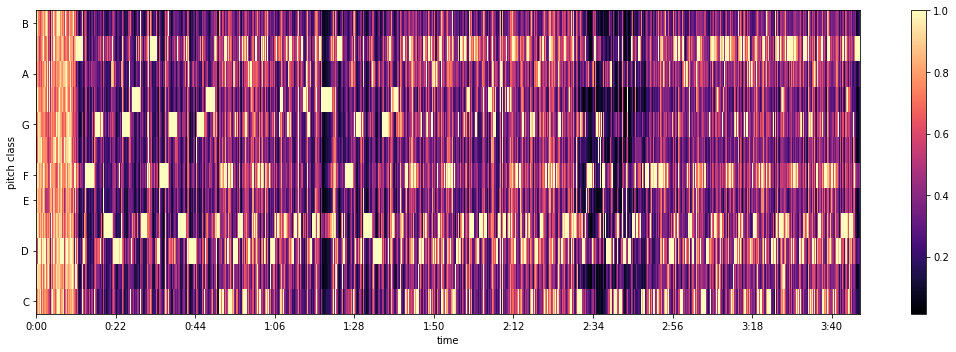

In [59]:
show_chroma_cqt(music11, sr11)

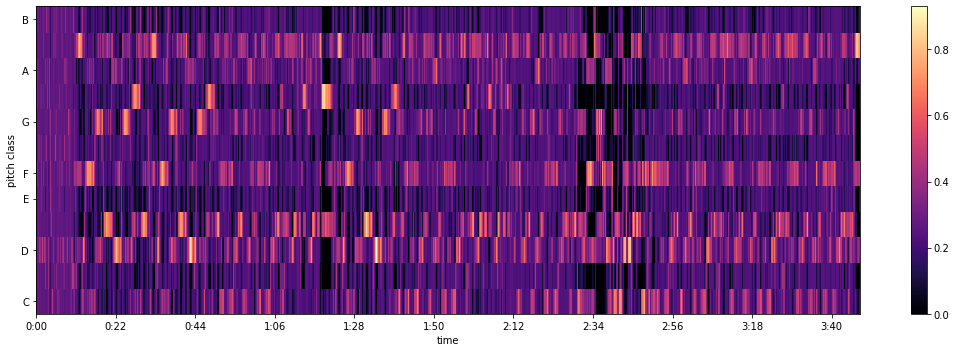

In [60]:
show_chroma_cens(music11, sr11)

In [61]:
# 더더 "It's You"
music12, sr12 = librosa.load(music_test1[1], sr=SAMPLING_RATE, duration=None) # 샘플링레이트 44100, 전체 길이
music12, sr12

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


(array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), 44100)

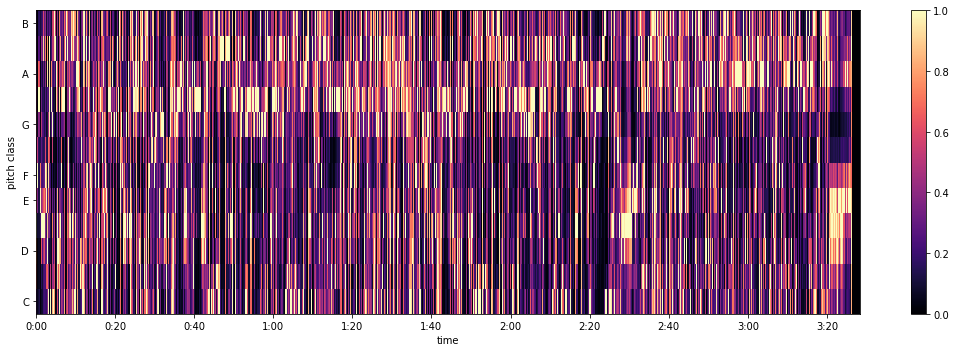

In [62]:
show_chroma_stft(music12, sr12)

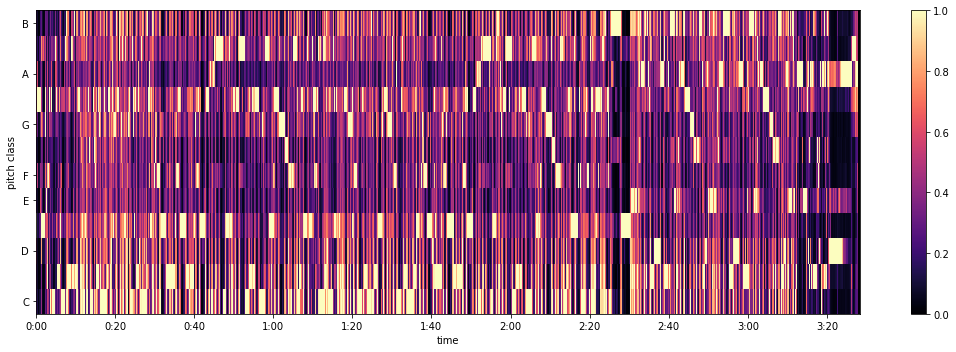

In [63]:
show_chroma_cqt(music12, sr12)

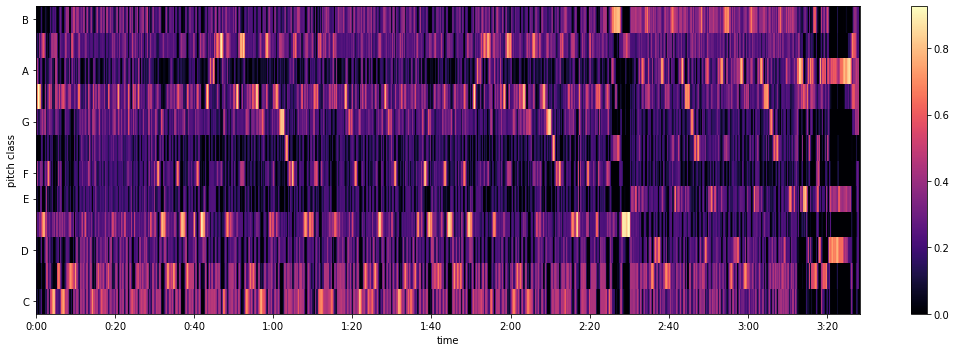

In [64]:
show_chroma_cens(music12, sr12)

In [88]:
# melspectrogram 시각화 함수 정의
def show_melspectrogram(music, sr):
  S = librosa.feature.melspectrogram(y=music, sr=sr)
  S_db = librosa.power_to_db(S, ref=np.max)
  seconds = len(music)/SAMPLING_RATE

  plt.figure(figsize=(15,5))
  librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='mel', fmax=8000)
  plt.colorbar()
  plt.tight_layout()
  plt.xlabel('time')
  plt.ylabel('Hz')
  plt.xticks(np.arange(0, seconds, seconds//10)) # 좌표간격 설정
  plt.show()

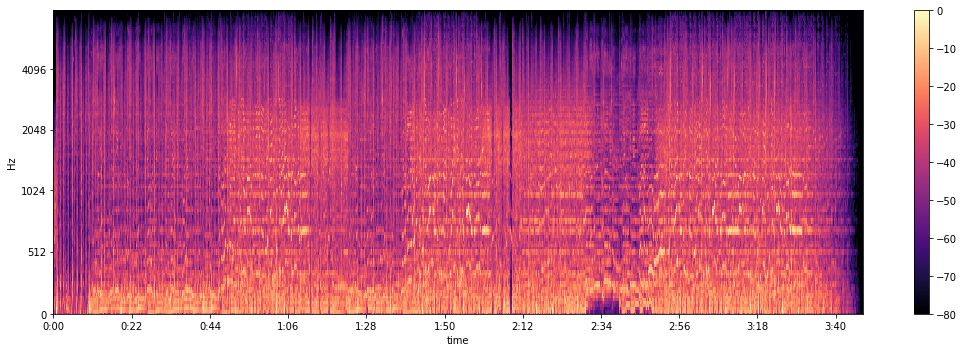

In [89]:
show_melspectrogram(music11, sr11)

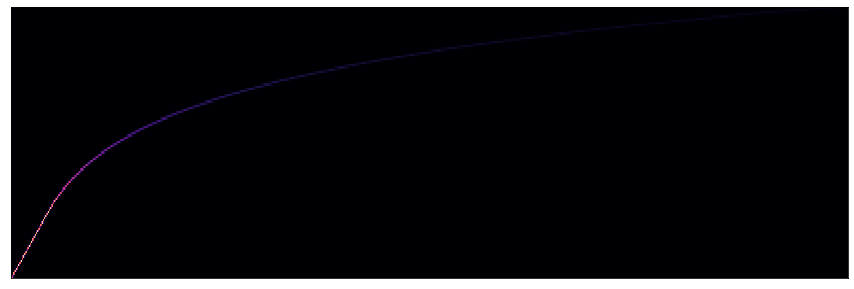

In [67]:
plt.figure(figsize=(15,5))
librosa.display.specshow(librosa.filters.mel(SAMPLING_RATE, n_fft=2048))
plt.show()

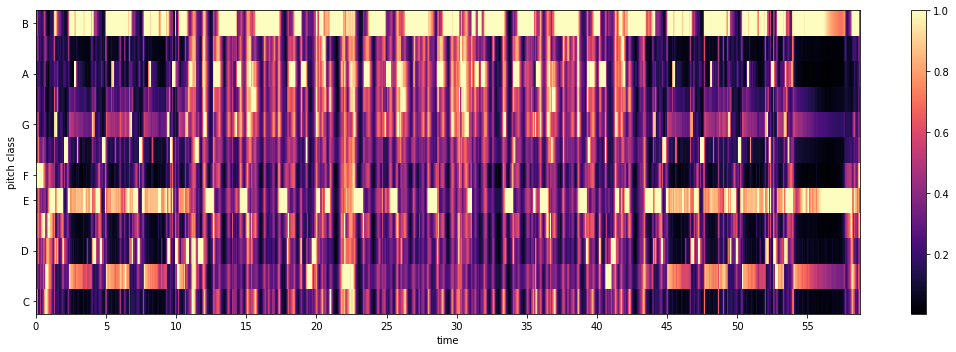

In [68]:
show_chroma_cqt(music, sr)

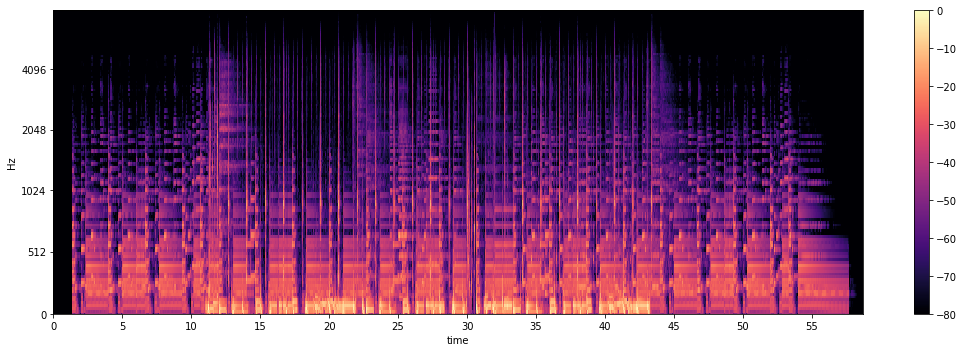

In [90]:
show_melspectrogram(music, sr)

In [70]:
hop_length = 512
n_fft = 2048

chroma2 = librosa.stft(music, n_fft=n_fft, hop_length=hop_length)

magnitude = np.abs(chroma2)

log_spectrogram = librosa.amplitude_to_db(magnitude, ref=np.max)

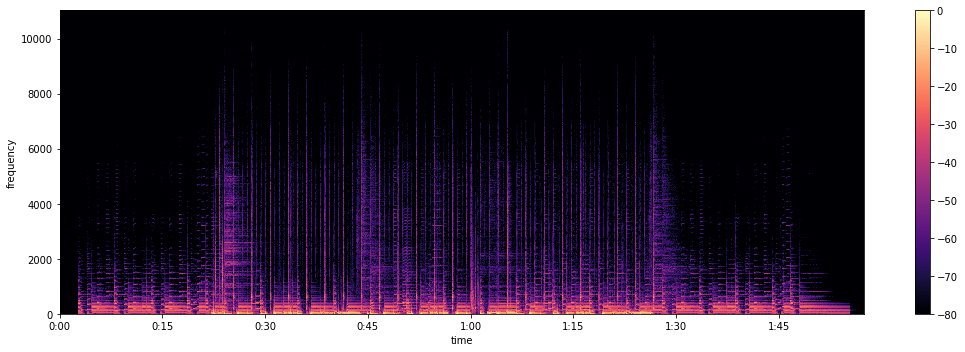

In [71]:
plt.figure(figsize=(15,5))
librosa.display.specshow(log_spectrogram, x_axis='time', y_axis='hz')
plt.colorbar()
plt.tight_layout()
plt.xlabel('time')
plt.ylabel('frequency')
plt.show()

In [72]:
chroma_stft.shape, chroma2.shape

((12, 5059), (1025, 5059))